In [1]:
from io import BytesIO
import zipfile

import ipywidgets
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
jobs = pd.read_csv('Techand_Skills.csv')
# jobs = jobs.rename(columns={"Job_Title": "JOB TITLE"})
jobs

,Job_Title,relatedSkills
0,.Net Application Developer,Microsoft technologies;Software development;C#...
1,.Net Architect,Software development;C#;Microsoft Windows Azur...
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...
4,.Net SDET,NaN
...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...
1464,iOS Architect,Software development;Interfaces;Computer scien...
1465,iOS Developer,Software development;RESTful;Quality assurance...


In [3]:
def load_data(year):
    url = 'https://www.bls.gov/oes/special.requests/oesm{}nat.zip'.format(year % 100)
    resp = requests.get(url)
    zf = zipfile.ZipFile(BytesIO(resp.content))
    for fi in zf.filelist:
        if fi.filename.rstrip('x').endswith('_dl.xls'):
            f = zf.read(fi)
            df = pd.read_excel(f)
            df.columns = df.columns.str.lower()
            df['year'] = year
            return df
    raise RuntimeError('Could not find correct Excel file within Zip archive.')

In [4]:
def load_years(years):
    frames = []
    for year in years:
        df = load_data(year)
        frames.append(df)
    return frames

In [5]:
# df_all.area_type.nunique()

In [6]:
# df_all.info()

In [7]:
# new = pd.merge(df_project, jobs, left_on=  ['occ_title'],
#                    right_on= ['Job_Title'], 
#                    how = 'inner')
# new
# df_project[df_project['occ_title'] == 'Developer']

In [8]:
# df_project  = df_all[['tot_emp','occ_title',
#                       'a_mean','annual','year',
                      
#                      ]]
# df_project

In [10]:
df_all.occ_title.nunique()

1272

In [9]:
df_all = pd.concat(load_years(range(2010, 2021)))
df_all
# print(df_all.describe(include='all').to_latex())

,occ_code,occ_title,group,tot_emp,emp_prse,h_mean,a_mean,mean_prse,h_pct10,h_pct25,...,area_type,naics,naics_title,i_group,own_code,o_group,jobs_1000,loc_quotient,pct_total,prim_state
0,00-0000,All Occupations,total,127097160,0.1,21.35,44410,0.1,8.51,10.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,6022860,0.2,50.69,105440,0.1,21.57,30.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-1011,Chief Executives,NaN,273500,0.5,83.34,173350,0.3,36.14,51.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1021,General and Operations Managers,NaN,1708080,0.3,54.38,113100,0.2,22.73,31.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-1031,Legislators,NaN,65710,1.3,*,38470,1.2,*,*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,53-7081,Refuse and Recyclable Material Collectors,NaN,120850,1.8,20.49,42620,1.2,11.48,14.51,...,1.0,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US
1325,53-7120,"Tank Car, Truck, and Ship Loaders",NaN,12610,9,24.36,50670,2.2,14.96,17.44,...,1.0,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US
1326,53-7121,"Tank Car, Truck, and Ship Loaders",NaN,12610,9,24.36,50670,2.2,14.96,17.44,...,1.0,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US
1327,53-7190,Miscellaneous Material Moving Workers,NaN,26300,4.6,18.16,37770,1.5,12.05,13.35,...,1.0,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US


In [5]:
# df_all.t

In [21]:
latex_test = df_all[['occ_code','occ_group','occ_title','group','tot_emp','annual','hourly', 'year','area',
      'area_title','prim_state','emp_prse','mean_prse','a_mean','a_median']].describe(include='all').T[['count', 'unique','top']]

In [23]:
# print(latex_test.to_latex())

In [9]:
# for i in df_all.group:
#     print(i)
# major_groups = df_all[df_all['occ_code'].str.endswith('0000')]
# major_groups

## Management Occupations 11-0000
## Business and Financial Operations Occupations 13-0000
## Computer and Mathematical Occupations 15-0000

In [43]:
df_tech = df_all[df_all.occ_code.str.startswith(('11', '13', '15'))]

In [21]:
df_farming = df_all[df_all.occ_code.str.startswith('45')]

In [6]:
df_computer = df_all[df_all.occ_code.str.startswith('15')]

In [11]:
computer_titles = ['Computer and Mathematical Occupations',
       'Computer and Information Research Scientists',
       'Computer Systems Analysts', 'Computer Programmers',
       'Software Developers, Applications',
       'Software Developers, Systems Software', 'Database Administrators',
       'Network and Computer Systems Administrators*',
       'Computer Support Specialists',
       'Information Security Analysts, Web Developers, and Computer Network Architects',
       'Computer Occupations, All Other*', 'Actuaries', 'Mathematicians',
       'Operations Research Analysts', 'Statisticians',
       'Mathematical Technicians',
       'Mathematical Science Occupations, All Other',
       'Computer Occupations', 'Computer and Information Analysts',
       'Information Security Analysts',
       'Software Developers and Programmers', 'Web Developers',
       'Database and Systems Administrators and Network Architects',
       'Network and Computer Systems Administrators',
       'Computer Network Architects', 'Computer User Support Specialists',
       'Computer Network Support Specialists',
       'Miscellaneous Computer Occupations',
       'Computer Occupations, All Other',
       'Mathematical Science Occupations',
       'Miscellaneous Mathematical Science Occupations',
       'Database and Network Administrators and Architects',
       'Database Administrators and Architects',
       'Software and Web Developers, Programmers, and Testers',
       'Software Developers and Software Quality Assurance Analysts and Testers',
       'Web Developers and Digital Interface Designers',
       'Data Scientists and Mathematical Science Occupations, All Other']

In [12]:
len(computer_titles)

37

In [17]:
# (df_computer.occ_title.unique())

In [22]:
df_farming['total employee'] = pd.to_numeric(df_farming['tot_emp'], errors='coerce')

In [9]:
df_computer['total employee'] = pd.to_numeric(df_computer['tot_emp'], errors='coerce')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [23]:
df_farming['mean salary'] = pd.to_numeric(df_farming['a_mean'], errors='coerce')

In [7]:
df_computer['mean salary'] = pd.to_numeric(df_computer['a_mean'], errors='coerce')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [35]:
# major_groups = df_all['occ_code'].str.endswith('0000') # endswith 0000 is the mother node? 
major_groups = df_all['occ_code']
df_all['occ_code'].unique()


array(['00-0000', '11-0000', '11-1011', ..., '53-4022', '53-6098',
       '53-7065'], dtype=object)

In [16]:
# df_computer['occ_code'].unique()

In [9]:
# sns.lineplot(data=df_all[major_groups], x='year', y='mean salary', hue='occ_title')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [15]:
# titles = sorted(list(df_all[major_groups]['occ_title'].unique()))
# titles = sorted(list(df_computer['occ_title'].unique()))
# titles

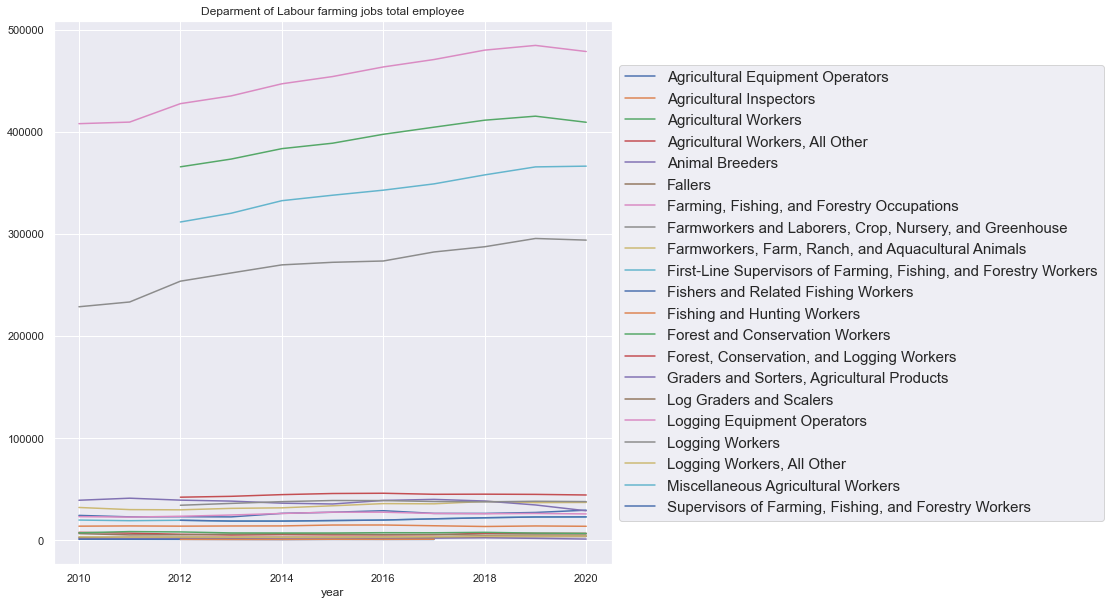

In [33]:
# df_farming.set_index('year', inplace=True)

#group data by product and display sales as line chart
ax = df_farming.groupby('occ_title')['total employee'].plot(figsize=(10, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 15})

title_timeplot = 'Deparment of Labour farming jobs total employee'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

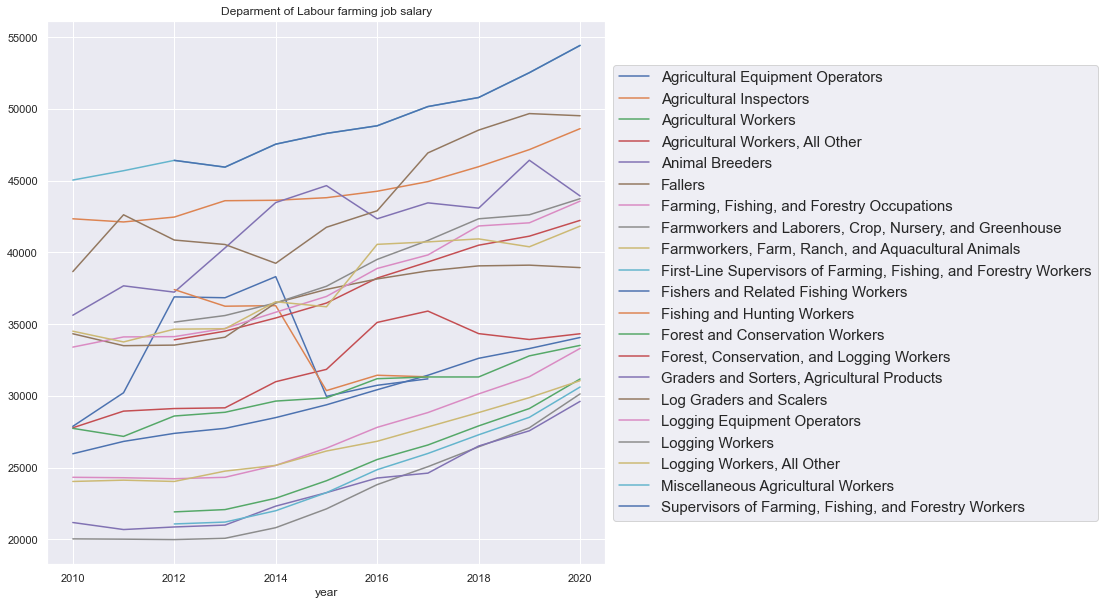

In [34]:
ax = df_farming.groupby('occ_title')['mean salary'].plot(figsize=(10, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 15})

title_timeplot = 'Deparment of Labour farming job salary'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

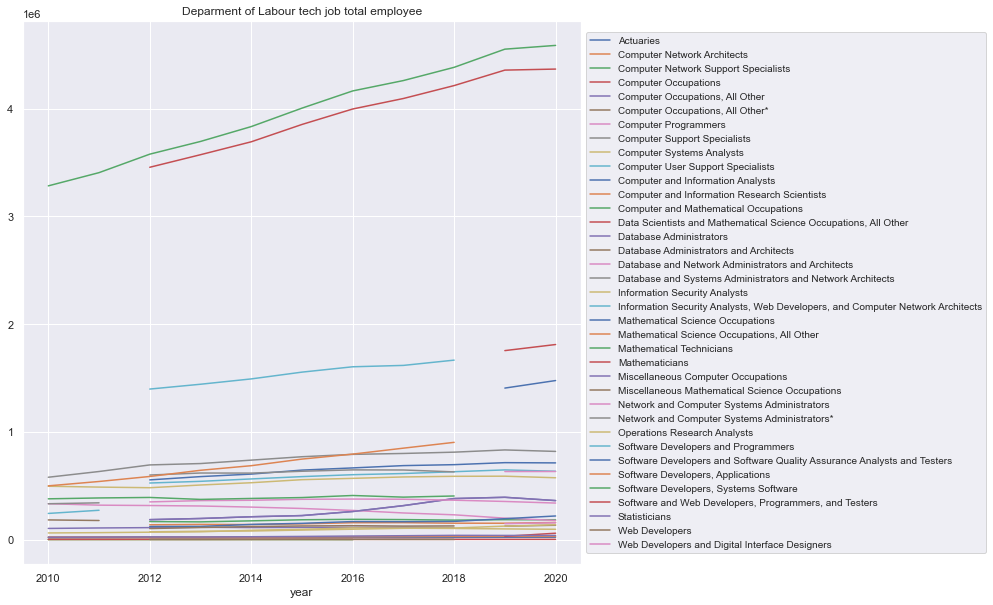

In [11]:
df_computer.set_index('year', inplace=True)

#group data by product and display sales as line chart
ax = df_computer.groupby('occ_title')['total employee'].plot(figsize=(10, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 10})

title_timeplot = 'Deparment of Labour tech job total employee'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

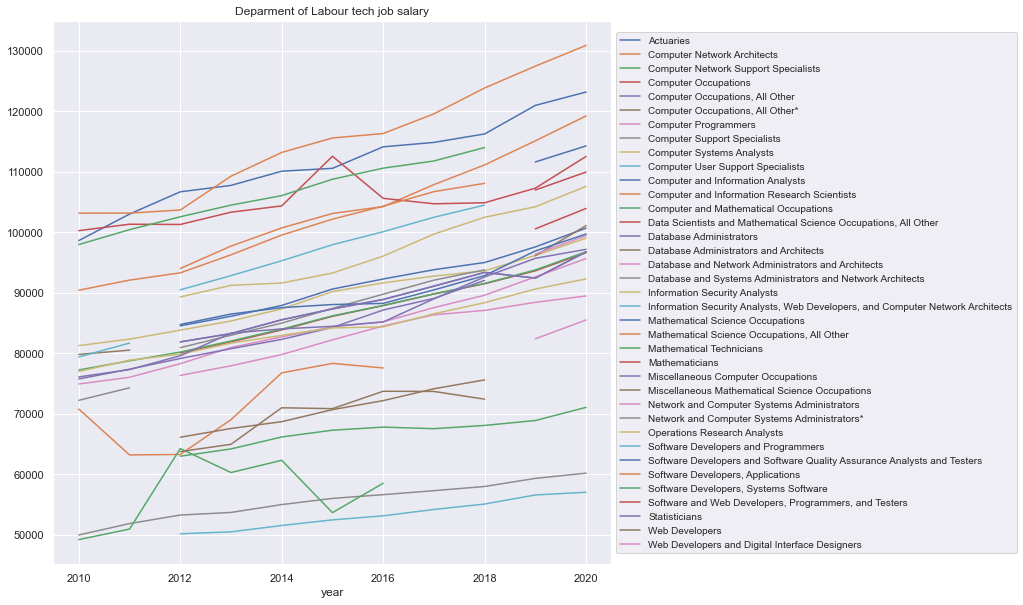

In [77]:
# df_computer.set_index('year', inplace=True)

#group data by product and display sales as line chart
ax = df_computer.groupby('occ_title')['mean salary'].plot(figsize=(10, 10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 10})

title_timeplot = 'Deparment of Labour tech job salary'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

In [34]:
@ipywidgets.interact(title=titles)
def plot_group(title=titles[0]):
    ind = titles.index(title)
    for t in titles[:ind] + titles[ind+1:] + [title]:
        color = ('r' if t == title else '0.7')
        df = df_computer[df_computer['occ_title'] == t]
        plt.plot(df['year'], df['mean salary'], c=color)
    plt.xlabel('year')
    plt.ylabel('mean salary')

interactive(children=(Dropdown(description='title', options=('Actuaries', 'Computer Network Architects', 'Comp…

# TBD

In [15]:
# import requests
# import json
# import prettytable
# headers = {'Content-type': 'application/json'}
# data = json.dumps({"seriesid": ['WMU00000001020000001730272400'],"startyear":"2020", "endyear":"2020"})
# p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
# json_data = json.loads(p.text)
# for series in json_data['Results']['series']:
#     x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
#     seriesId = series['seriesID']
#     for item in series['data']:
#         year = item['year']
#         period = item['period']
#         value = item['value']
#         footnotes=""
#         for footnote in item['footnotes']:
#             if footnote:
#                 footnotes = footnotes + footnote['text'] + ','
#         if 'M01' <= period <= 'M12':
#             x.add_row([seriesId,year,period,value,footnotes[0:-1]])
#     output = open(seriesId + '.txt','w')
#     output.write (x.get_string())
#     output.close()